In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

## importing data

In [2]:
q1 = pd.read_csv('LoanStats_2016Q1.csv', header = 0, dtype={'desc': str,
                                                            'verification_status_joint':str})

In [3]:
q2 = pd.read_csv('LoanStats_2016Q2.csv', header = 0, dtype={'desc': str,
                                                            'verification_status_joint':str})

In [4]:
q3 = pd.read_csv('LoanStats_2016Q3.csv', header = 0, dtype={'desc': str,
                                                            'verification_status_joint':str})

In [5]:
q4 = pd.read_csv('LoanStats_2016Q4.csv', header = 0, dtype={'desc': str,
                                                            'verification_status_joint':str})

In [101]:
condition =  all_data['loan_status'] == 'Charged Off'
all_data.where(condition, inplace = True)
all_data['loan_amount'] = all_data['loan_amnt'] - all_data['total_pymnt']
all_data['loan_amount'].sum()

345649354.4109999

In [141]:
all_data = pd.concat(objs = [q1,q2,q3,q4])


In [143]:
all_data['loan_amnt'].mean()

14734.039046332126

## Task 1

In [56]:
quarters = [q1,q2,q3,q4]

quarterly_percentages = []

all_off = 0
all_entries = 0

for q in quarters:
    values = q['loan_status'].value_counts()
    
    total = values.sum()
    all_entries += total 
    
    charged_off = values['Charged Off']
    all_off += charged_off
    
    quarterly_percentages.append(round(charged_off/total * 100,2))
    
overall = round(all_off/all_entries * 100,4)

[quarterly_percentages, overall, all_entries]


    

[[9.74, 8.18, 6.25, 3.48], 7.1003, 434407]

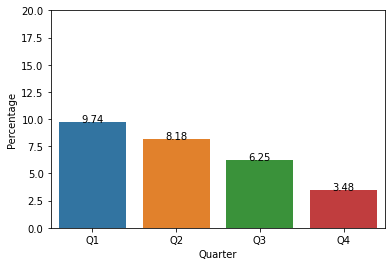

In [59]:
sns.color_palette("tab10")

fig = sns.barplot(x = ['Q1','Q2','Q3','Q4'] , y = quarterly_percentages)
fig.set(xlabel= 'Quarter', ylabel='Percentage')
plt.ylim(0, 20)
for bar in fig.patches:
    fig.annotate(bar.get_height(),
                 (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                 ha = 'center')
plt.show()

In [169]:
def make_df(q_data):
    
    condition =  q_data['loan_status'] == 'Charged Off'
    q_data.where(condition, inplace = True)
    quarterly_count = q_data[['issue_d', 'loan_status']].groupby(['issue_d']).count()
    
    months = ['16-Jan','16-Feb','16-Mar', '16-Apr','16-May','16-Jun','16-Jul','16-Aug','16-Sep','16-Oct','16-Nov', '16-Dec']
    quarterly_count.index = pd.CategoricalIndex(quarterly_count.index, categories = months, ordered = True)
    quarterly_count = quarterly_count.sort_index()
    
    return quarterly_count

In [170]:
data = make_df(all_data)
data

,loan_status
issue_d,
16-Jan,3321
16-Feb,3840
16-Mar,5882
16-Apr,3252
16-May,2385
16-Jun,2369
16-Jul,2440
16-Aug,2243
16-Sep,1508


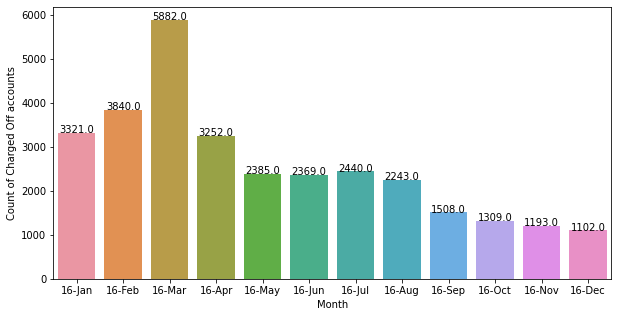

In [76]:
plt.figure(figsize=(10,5))
fig = sns.barplot(x = data.index, y = data['loan_status'])
fig.set(xlabel= 'Month', ylabel='Count of Charged Off accounts')
for bar in fig.patches:
    fig.annotate(bar.get_height(),
                 (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                 ha = 'center')
plt.show()

## Task 2

In [103]:
all_data['annual_inc'].mean()

73520.56774996758

In [104]:
all_data['annual_inc_joint'].mean()

100433.35606122449

In [119]:
values = all_data['application_type'].value_counts()
total = values.sum()
joint = values['Joint App']
individual = total - joint
percentage = individual/total

percentage, values


(0.9797678214209256,
 Individual    425618
 Joint App       8789
 Name: application_type, dtype: int64)

In [122]:
values = all_data['home_ownership'].value_counts()
total = values.sum()
individual = total - joint
percentage = individual/total

percentage, values, total


(0.9797678214209256,
 MORTGAGE    211516
 RENT        169744
 OWN          53037
 ANY            110
 Name: home_ownership, dtype: int64,
 434407)

In [124]:
values = all_data['emp_length'].value_counts()
total = values.sum()
individual = total - joint
percentage = individual/total

percentage, values, total


(0.9783625025542045,
 10+ years    149972
 2 years       39601
 3 years       34734
 < 1 year      31918
 1 year        29156
 5 years       26475
 4 years       25820
 8 years       18774
 6 years       18656
 9 years       16884
 7 years       14203
 Name: emp_length, dtype: int64,
 406193)

In [182]:
149972/406193

0.3692136496689997

In [131]:
values = all_data['delinq_2yrs'].value_counts()
total = values.sum()
individual = total - (values[0] + values[1] + values[2] + values[3] + values[4] + values[5]) 
percentage = individual/total

percentage, values, total


(0.005487941032257767,
 0     341966
 1      60197
 2      18168
 3       6986
 4       3153
 5       1553
 6        917
 7        519
 8        320
 9        201
 10       135
 11        82
 12        60
 13        43
 14        34
 15        25
 16        13
 17         9
 18         8
 19         7
 20         6
 21         3
 22         1
 29         1
 Name: delinq_2yrs, dtype: int64,
 434407)

In [132]:
values[0] + values[1] + values[2] + values[3] + values[4] + values[5]

432023

## Task 3

In [146]:
all_data = pd.concat(objs = [q1,q2,q3,q4])

In [149]:
purpose_counts = all_data['purpose'].value_counts()
purpose_counts

debt_consolidation    248899
credit_card            91609
home_improvement       31182
other                  28469
major_purchase         10406
medical                 5440
car                     4813
small_business          4790
vacation                3262
moving                  3229
house                   2002
renewable_energy         304
wedding                    2
Name: purpose, dtype: int64

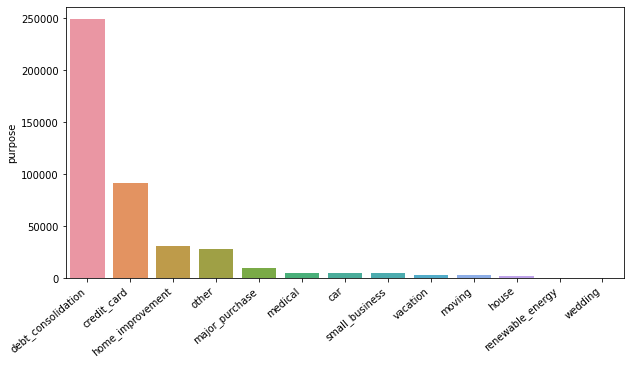

In [153]:
plt.figure(figsize=(10,5))
fig = sns.barplot(x = purpose_counts.index, y = purpose_counts)
fig.set_xticklabels(fig.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [174]:
condition = all_data['purpose'] == 'debt_consolidation'
all_data.where(condition, inplace = True)
debt_home = all_data[['home_ownership', 'loan_amnt']].groupby(['home_ownership']).count()
de

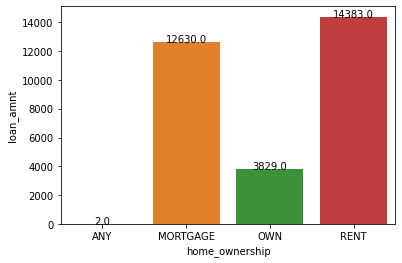

In [178]:
# plt.figure(figsize=(10,5))
fig = sns.barplot(x = debt_home.index, y = debt_home['loan_amnt'])
# fig.set_xticklabels(fig.get_xticklabels(), rotation=40, ha="right")
for bar in fig.patches:
    fig.annotate(bar.get_height(),
                 (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                 ha = 'center')
plt.show()

In [179]:
12630+14383

27013

In [180]:
12630+14383+3829

30842

In [181]:
27013/30842

0.8758511121198366